# DeepPavlov - an Open-Source Conversational AI Framework 

---

DeepPavlov is a conversational open-source library for Natural Language Processing (NLP) and Multiskill AI Assistant development. DeepPalvov is based on PyTorch. This article describes how to use our new Transformer-based models including, text classification, sequence classification, and question answering. The models are based on the Transformer library from Hugging Face. The library enables developers to use a wide variety of transformer-based models, moreover, we support Datasets from Hugging Face with hundreds of datasets to train your model.

![image info](https://static.tildacdn.com/tild3762-3666-4530-b139-666433343863/_DeepPavlov_-5.png)

## Install DeepPavlov Library

DeepPavlov Library is an open-source framework for NLP. It contains all essential state-of-the-art models for developing chatbots, including but not limited to text classification, sequence classification, question answering. But first, you should install DeepPavlov by running.

In [ ]:
!pip install deeppavlov -q

## QuickStart

The [DeepPavlov](https://deeppavlov.ai/) NLP pipelines are defined in the separate configuration files under the *config/faq* folder. List of models is available on
[the doc page](http://docs.deeppavlov.ai/en/master/features/overview.html)

When you are decided on the model and a configuration file, there are two ways to use it

* via **Command Line Interface (CLI)**
* via **Python**
* via **Rise API**

## How to use DeepPavlov Library

---



Let’s demonstrate the DeepPavlov CLI interface by running text classification model. It involves predicting whether a comment posted during a public discussion is considered insulting to one of the participants. Basically, this is a binary classification problem with only two classes: *Insult* and *Not Insult*. 


Before using the model you should install all it's requirements by running `install`. You can retrain the model by running it with `train` command. To get predictions from a model interactively through CLI, run `interact`. Dataset will be downloaded if `-d` flag is set.

In [ ]:
!python -m deeppavlov install insults_kaggle_bert_torch

In [ ]:
!python -m deeppavlov interact insults_kaggle_bert_torch -d

In [ ]:
!python -m deeppavlov train insults_kaggle_bert_torch -d

The detailed description of the commands can be found in our docs.

---

## DeepPavlov for Text Classification




Let's demonstrate the DeepPavlov BERT-based text classification models using the insult detection problem. This problem involves predicting whether a comment posted during a public discussion is considered insulting to one of the participants. This is a binary classification problem with only two classes: Insult and Not Insult.

To interact with the model, first, you need to build_model. The download=True parameter indicates that we want to use an already pre-trained model:

In [ ]:
from deeppavlov import build_model, configs
model = build_model(configs.classifiers.insults_kaggle_bert_torch, download=True)
model(['hey, how are you?', 'You are so dumb!'])

You can evaluate the model by running `evaluate_model`

In [ ]:
from deeppavlov import evaluate_model
evaluate_model(configs.classifiers.insults_kaggle_bert_torch)

You can always use different version of transformer by specifying the TRANSFORMER variables in the metadata section, for example, `albert-base-v2`, `distilbert-base-uncased`, `bert-base-uncased`. Then you can retrain the model and check the results.

In [ ]:
import json
from deeppavlov import train_model

config = json.load(open(configs.classifiers.insults_kaggle_bert_torch))
config['metadata']['variables']['MODEL_PATH'] = "{MODELS_PATH}/classifiers/insults_kaggle_torch_bert/{TRANSFORMER}"
config['metadata']['variables']['TRANSFORMER'] = "distilbert-base-uncased"
model = train_model(configs.classifiers.insults_kaggle_bert_torch)
evaluate_model(model)

---

## DeepPavlov for Named Entity Recognition


DeepPavlov Transformers-based models can be used for sequence classification tasks such as Named Entity Recognition (NER) and Part of Speech (POS) tagging. For example, we want to extract persons' and organizations' names from the text. Then for the input text:

    Yan Goodfellow works for Google Brain

a NER model needs to provide the following sequence of tags:

    B-PER I-PER    O     O   B-ORG  I-ORG

Where B- and I- prefixes stand for the beginning and inside of the entity, while O stands for out of tag or no tag. Markup with the prefix scheme is called BIO markup. This markup is introduced for distinguishing consequent entities with similar types.
You can interact with the modela via the CLI.

In [ ]:
!python -m deeppavlov install ner_ontonotes_bert_torch.json
!python -m deeppavlov interact ner_ontonotes_bert_torch.json -d

and via the Python code

In [ ]:
from deeppavlov import build_model, configs
ner = build_model(configs.ner.ner_ontonotes_bert_torch, download=True)
ner(["Computer Sciences Corp . , El Segundo , Calif . , said it is close to making final an agreement to buy Cleveland Consulting Associates from Saatchi & Saatchi"])

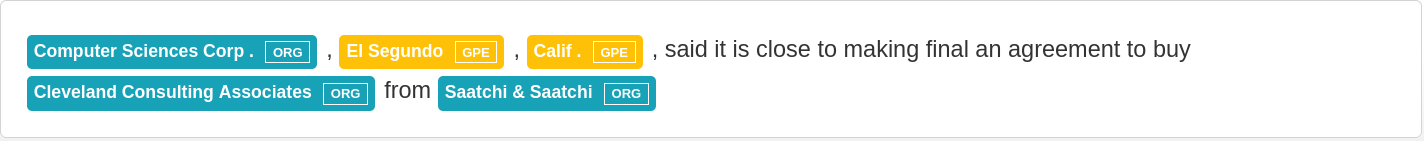

Usually, for every Transformer based model, you can find two versions: the English version and the multilingual version (trained in 103 languages). The multilingual transformer can transfer knowledge between languages, for example, you can fine-tune a model on one language and evaluate the model on another. More about language transfer you can find here.

In [ ]:
!python -m deeppavlov install ner_ontonotes_bert_mult_torch

Then interact with it via the Python code

In [ ]:
from deeppavlov import build_model, configs
ner_mult = build_model(configs.ner.ner_ontonotes_bert_mult_torch, download=True)
ner_mult(['Curling World Championship will be held in Antananarivo',
          'Чемпионат мира по кёрлингу пройдёт в Антананариву'])

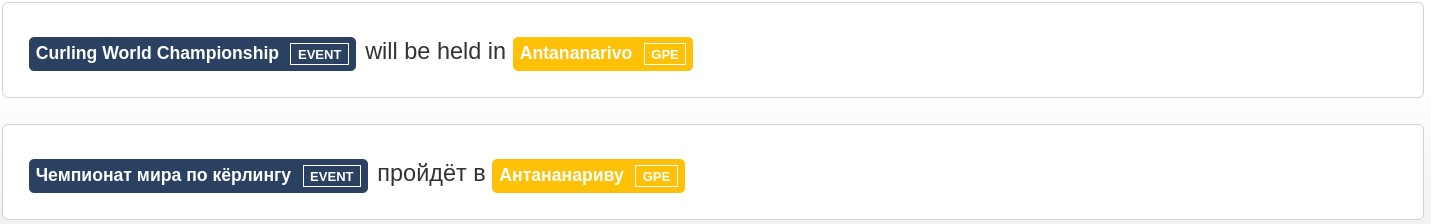

---

## DeepPavlov for Question Answering


One can use DeepPavlov for extractive Question Answering (QA). Question Answering can be achieved by using the Reading Comprehension approach that seeks an answer in the given text. The Natural Language Processing (NLP) community has been working on this task for quite a while. Question Answering on SQuAD dataset is a task to find an answer to a question in a given context (e.g., a paragraph from Wikipedia), where the answer to each question is a segment of the context.

```
CONTEXT:
    In meteorology, precipitation is any product of the condensation of atmospheric water vapor that falls under gravity. The main forms of precipitation include drizzle, rain, sleet, snow, graupel and hail… Precipitation forms as smaller droplets coalesce via collision with other rain drops or ice crystals within a cloud. Short, intense periods of rain in scattered locations are called “showers”.

QUESTION:
    Where do water droplets collide with ice crystals to form precipitation?
    
ANSWER:
    within a cloud
   
```

Intstall the model's requirements

# !python -m deeppavlov install squad_torch_bert

Then interact with the model via the Python code

In [ ]:
from deeppavlov import build_model, configs
model = build_model(configs.squad.squad_torch_bert, download=True)
model(['In meteorology, precipitation is any product of the condensation of atmospheric water vapor that falls under gravity. The main forms of precipitation include drizzle, rain, sleet, snow, graupel and hail… Precipitation forms as smaller droplets coalesce via collision with other rain drops or ice crystals within a cloud. Short, intense periods of rain in scattered locations are called “showers”.'], 
      ['Where do water droplets collide with ice crystals to form precipitation?'])

Model returns an answer, position in characters and confidence.

# Useful Links
---

[DeepPavlov Repository](https://github.com/deepmipt/DeepPavlov)

[DeepPavlov Demo Page](https://demo.deeppavlov.ai)

[DeepPavlov Documentation](https://docs.deeppavlov.ai)

[Our Forum](https://forum.deeppavlov.ai)

[Our Medium](https://medium.com/deeppavlov)